In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## For this code I varied the grid size by taking 3 different grid sizes, namely 10,40,100. I evaluated each at t = 2*pi.

## I took dx = (2*pi)/(number_grid_points-1) and dt = dx/4

In [2]:
X = np.loadtxt('Lax_diff.txt')


In [3]:
x = np.linspace(0,2*pi,10),np.linspace(0,2*pi,20),np.linspace(0,2*pi,40),np.linspace(0,2*pi,80)
t = 2*np.pi
U = np.array([X[0:10],X[10:30],X[30:70],X[70:150]])

<ipython-input-3-ef8fff185d18>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  U = np.array([X[0:10],X[10:30],X[30:70],X[70:150]])


In [4]:
dx = np.array([x[0][1],x[1][1],x[2][1],x[3][1]])


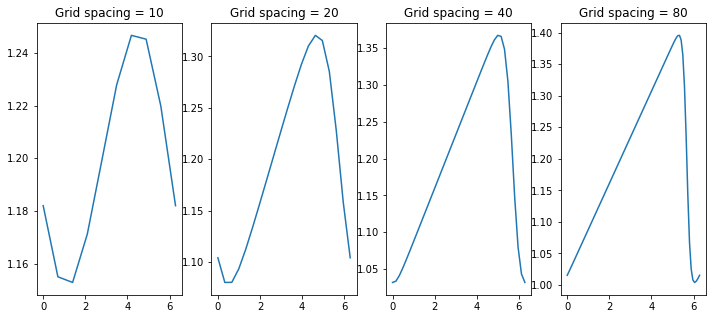

In [5]:
fig, ax = pyplot.subplots(1,4, figsize=(12, 5))
ax[0].set_title('Grid spacing = 10')
ax[0].plot(x[0],U[0])
#ax.plot(x[0],predicted_value_10)

ax[1].set_title('Grid spacing = 20')
ax[1].plot(x[1],U[1])
#ax[1].plot(x[1],predicted_value_50)

ax[2].set_title('Grid spacing = 40')
ax[2].plot(x[2],U[2])
#ax[2].plot(x[2],predicted_value_100)


ax[3].set_title('Grid spacing = 80')
ax[3].plot(x[3],U[3])
#ax[3].plot(x[3],predicted_value_100)

Text(0, 0.5, 'U (x)')

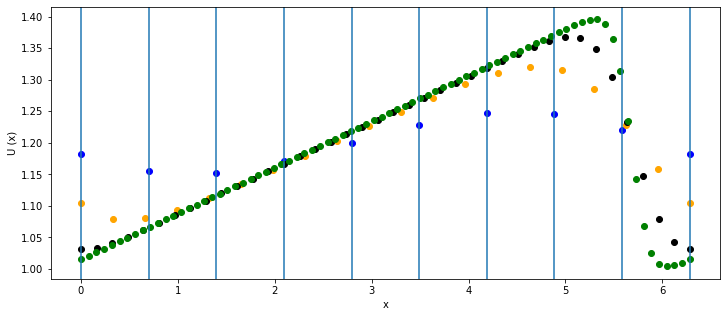

In [6]:
fig, ax = pyplot.subplots(1,1, figsize=(12, 5))
ax.scatter(x[0],U[0],color = 'blue')
#ax.plot(x[0],predicted_value_10)

ax.scatter(x[1],U[1],color = 'orange')
#ax[1].plot(x[1],predicted_value_50)


ax.scatter(x[2],U[2],color = 'black')
#ax[2].plot(x[2],predicted_value_100)

ax.scatter(x[3],U[3],color = 'green')
#ax[3].plot(x[3],predicted_value_100)
for i in range(len(x[0])):
    ax.axvline(x=x[0][i])
ax.set_xlabel('x')
ax.set_ylabel('U (x)')

## $$L_{2} = \sqrt{\sum_{i}^{n} (y_{i}-f(x_{i}))^{2}}$$

In [7]:
# create arrays for each U[0:2] from U[3]

#for U[2]
U_32 = U[3][0:len(U[3]):2]

#for U[1]
U_31 = U[3][0:len(U[3]):4]

#for U[0]
U_30 = U[3][0:len(U[3]):8]


In [8]:
l2_10 = np.sqrt(np.sum(np.power((U[0]-U_30),2)))
print(np.log(l2_10)) 

-1.2646631051477542


In [9]:
l2_20 = np.sqrt(np.sum(np.power((U[1]-U_31),2)))
print(np.log(l2_20)) 

-1.4159555500220675


In [10]:
l2_40 = np.sqrt(np.sum(np.power((U[2]-U_32),2)))
print(np.log(l2_40)) 

-1.9173915502001944


Text(0, 0.5, '$L_{2}$')

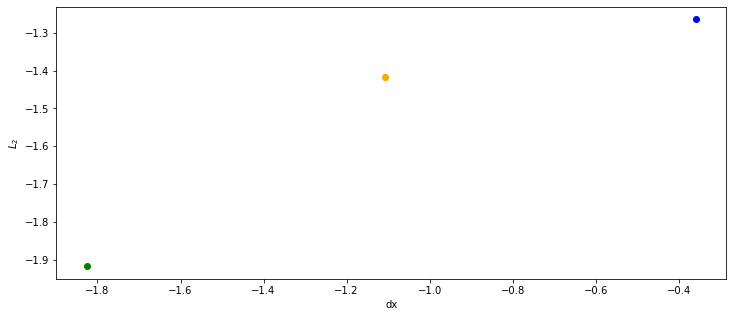

In [12]:
fig, ax = pyplot.subplots(1,1, figsize=(12, 5))
ax.scatter(np.log(dx[0]),np.log(l2_10),c = 'blue')
ax.scatter(np.log(dx[1]),np.log(l2_20),c='orange')
ax.scatter(np.log(dx[2]),np.log(l2_40),c='green')
ax.set_xlabel('dx')
ax.set_ylabel('$L_{2}$')

In [13]:
slope = (np.log(l2_10/l2_40))/(np.log(dx[0]/dx[2]))

print(slope)

0.44514215656399986


In [14]:
print(np.log(dx))

[-0.35934751 -1.10656191 -1.82568458 -2.53157079]


## The convergence order, C, is $$C \approx 0.45$$

It appears that this Lax method converges almost like a square root function. However, I am a little confused by this since we used a linear shock capturing method, so I was expecting a linear order of convergence. I plan on discussing more of this with you in the near future since I probably have misunderstood something.